In [2]:
import numpy as np
import matplotlib.pyplot as plt

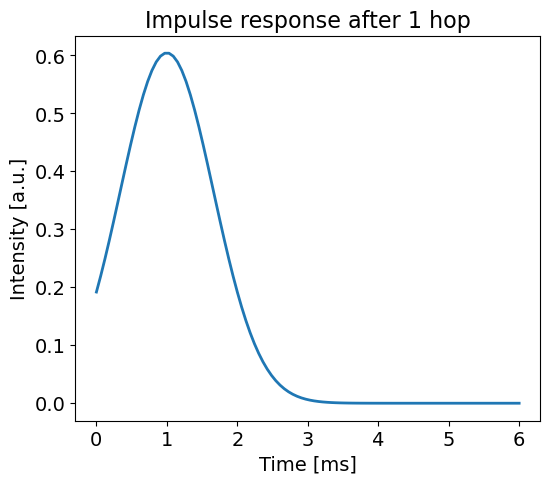

In [62]:
def gaussian(x, mu=0, sigma=.66):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

x = np.linspace(0, 6, 100)

fig, axes = plt.subplots(1, 1, figsize=(6, 5))

mu=1
axes.plot(x, gaussian(x, mu=mu), lw=2, label='mu=0, sigma=1')

axes.set_title(rf"Impulse response after 1 hop", fontsize=16)
axes.set_xlabel("Time [ms]", fontsize=14)
axes.set_ylabel("Intensity [a.u.]", fontsize=14)
axes.tick_params(labelsize=14)

plt.savefig(f"../figures/single_hop_{mu}s.png", dpi=300)

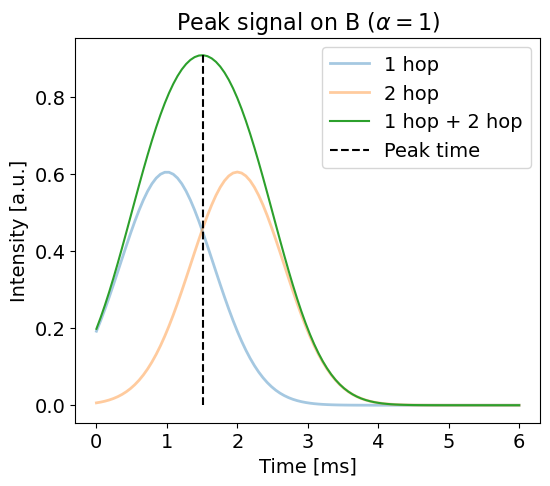

In [61]:
x = np.linspace(0, 6, 100)


fig, axes = plt.subplots(1, 1, figsize=(6, 5))

alpha = 1

plt.plot(x, gaussian(x, mu=1), lw=2, alpha=.4, label='1 hop')
plt.plot(x, alpha*gaussian(x, mu=2), lw=2, alpha=.4, label='2 hop')
#plt.plot(x, gaussian(x, mu=3), alpha=.4, label='3 hop')

y = gaussian(x, mu=1) + alpha*gaussian(x, mu=2)
plt.plot(x, y, label='1 hop + 2 hop')
#plt.plot(x, gaussian(x, mu=1) + gaussian(x, mu=2) + gaussian(x, mu=3), label='1 hop + 2 hop + 3 hop')
#plt.plot(x, gaussian(x, mu=2) + gaussian(x, mu=3), label='2 hop + 3 hop')

#delays = [[1, 2], [1, 2, 3], [2, 3]]
delays = [[1, alpha*2]]

h_max = np.max(gaussian(x, mu=1) + gaussian(x, mu=2))
for d in delays:
    maxval = x[np.argmax(y)]
    plt.plot([maxval]*2, [0, h_max], 'k--', label="Peak time")#, label=f"Mean {d}")

axes.set_title(rf"Peak signal on B ($\alpha={alpha}$)", fontsize=16)
axes.set_xlabel("Time [ms]", fontsize=14)
axes.set_ylabel("Intensity [a.u.]", fontsize=14)
axes.tick_params(labelsize=14)
axes.legend(fontsize=14)

plt.savefig(f"../figures/multi_hop_a{alpha}.png", dpi=300)

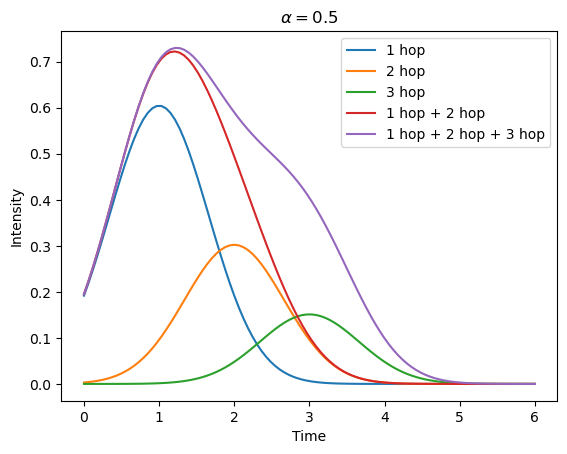

In [4]:
x = np.linspace(0, 6, 100)

alpha = 0.5

plt.title(fr"$\alpha={alpha}$")
plt.plot(x, gaussian(x, mu=1), label='1 hop')
plt.plot(x, alpha*gaussian(x, mu=2), label='2 hop')
plt.plot(x, np.power(alpha, 2)*gaussian(x, mu=3), label='3 hop')

plt.plot(x, gaussian(x, mu=1) + alpha*gaussian(x, mu=2), label='1 hop + 2 hop')
plt.plot(x, gaussian(x, mu=1) + alpha*gaussian(x, mu=2) + alpha*gaussian(x, mu=3), label='1 hop + 2 hop + 3 hop')

plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()

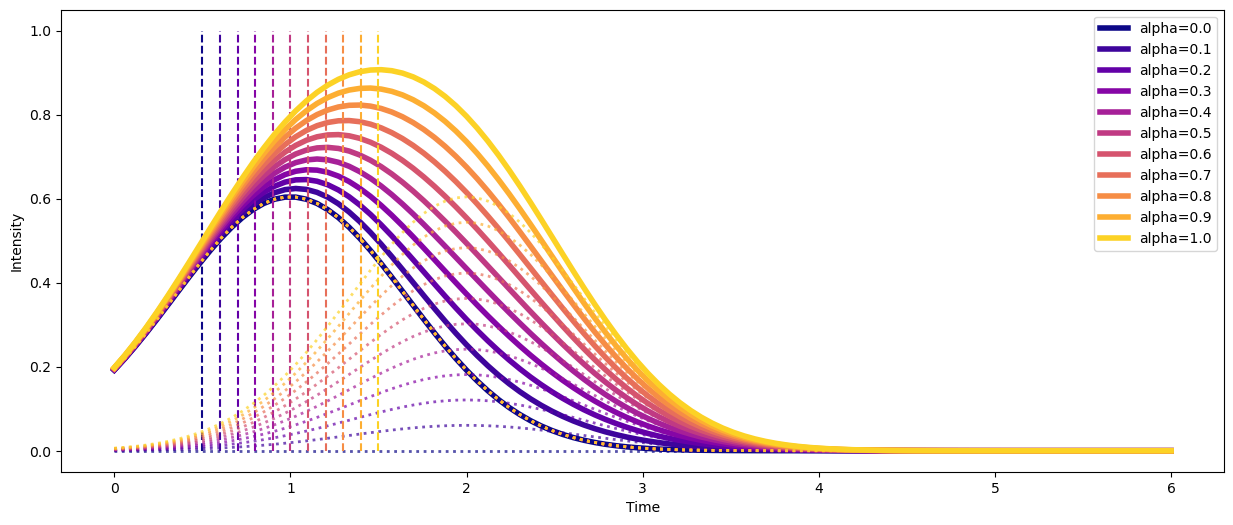

In [5]:
x = np.linspace(0, 6, 100)

fig, ax = plt.subplots(figsize=(15, 6))

n_alpha = 11
colors = plt.get_cmap("plasma", n_alpha+1)
for i, alpha in enumerate(np.linspace(0, 1, n_alpha)):
#for i, alpha in enumerate([1]):
    col = colors(i)
    plt.plot(x, gaussian(x, mu=1), lw=2, ls=":", alpha=.7, color=col)
    plt.plot(x, alpha*gaussian(x, mu=2), lw=2, ls=":", alpha=.7, color=col)
    plt.plot(x, gaussian(x, mu=1) + (alpha)*gaussian(x, mu=2), lw=4, color=col, label=f'alpha={alpha:1.1f}')
    plt.plot([np.mean([1, 2*alpha])]*2, [0, 1], ls="--", color=col)


plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()